In [16]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
data = pd.read_csv('data/Cars93.csv')

In [3]:
data.isnull().sum()
data = data.drop(['Luggage.room', 'Rear.seat.room'], axis=1)
# data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
data.head(3)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,Yes,13.2,5,177,102,68,37,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,Yes,18.0,5,195,115,71,38,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,Yes,16.9,5,180,102,67,37,3375,non-USA,Audi 90


In [6]:
target = 'MPG.city'
X = data.drop([target], axis=1)
y = data[[target]]

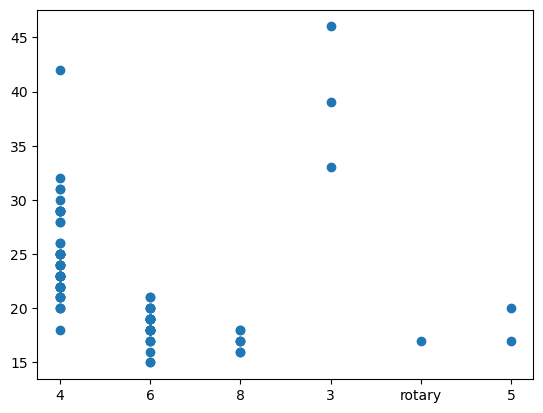

In [7]:
plt.scatter(X['Cylinders'], y)
plt.show()

In [ ]:
# tmp = pd.get_dummies(X['Type'], drop_first=True)
# X = pd.concat([X, tmp], axis=1)
# X = X.drop('Type', axis=1)

# tmp = pd.get_dummies(X['Cylinders'], drop_first=True)
# X = pd.concat([X, tmp], axis=1)
# X = X.drop('Cylinders', axis=1)

In [8]:
X = X.select_dtypes(exclude=['object'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2)

In [10]:
model = RandomForestRegressor(n_estimators=1000, random_state=0)
model.fit(X_train, y_train)
score= model.score(X_train, y_train)
score_val = model.score(X_test, y_test)
score, score_val

(0.5871328130654293, 0.34744611790352975)

In [11]:
y_pred = model.predict(np.array([6.5]).reshape(1, 1))
y_pred

C:\Users\TestAccount\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[  14.51607724,   27.59752054,   29.19367775,   30.78995717,
          24.71146093,    5.04833301,  191.95081822, 4209.17899351,
        1507.15480447,   20.51054712,    5.87031403,  207.34212543,
         113.98701721,   75.07150162,   43.54505588, 3838.67963979]])

## =============
## Wine Forest
## =============

In [12]:
from sklearn.datasets import load_wine
wine=load_wine()

data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [14]:
target = 'target'
X = data.drop([target], axis=1)
y = data[[target]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2)

### TITANIC FOREST

In [98]:
data = pd.read_csv('data/titanic_train.csv')

In [99]:
data.isnull().sum()
data = data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [100]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [112]:
data = data.dropna()
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [113]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [114]:
target = 'Survived'
X = data.drop([target], axis=1)
y = data[[target]]

<function matplotlib.pyplot.show(close=None, block=None)>

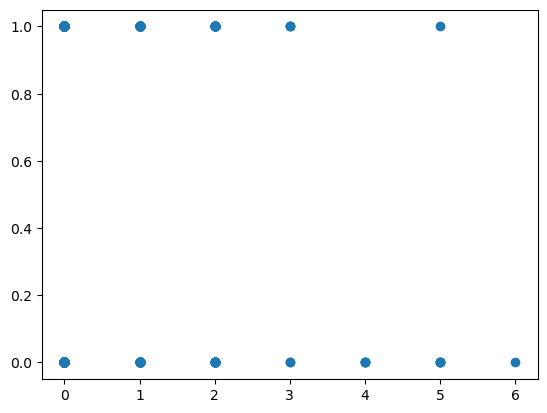

In [115]:
plt.scatter(X['Parch'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

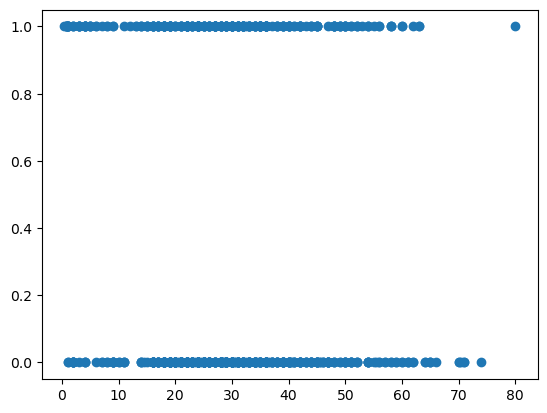

In [116]:
plt.scatter(X['Age'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

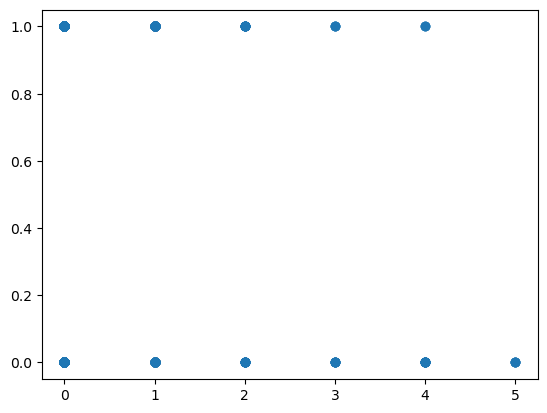

In [117]:
plt.scatter(X['SibSp'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

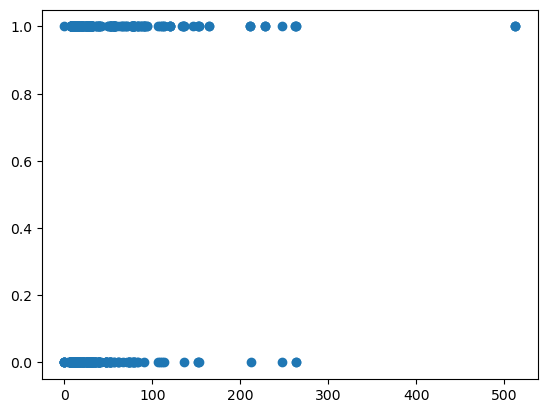

In [118]:
plt.scatter(X['Fare'], y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

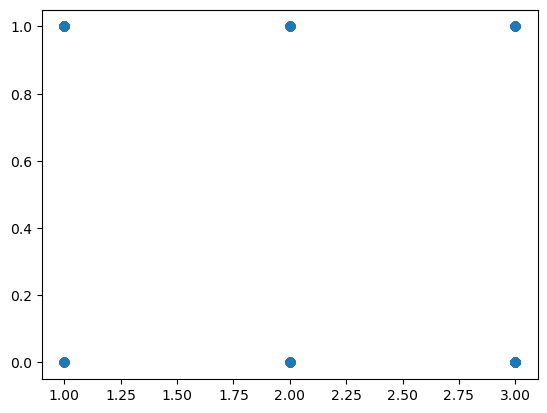

In [119]:
plt.scatter(X['Pclass'], y)
plt.show

In [123]:
tmp = pd.get_dummies(X['Sex'], drop_first=True)
X = pd.concat([X, tmp], axis=1)
X = X.drop('Sex', axis=1)
tmp2 = pd.get_dummies(X['Embarked'], drop_first=True)
X = pd.concat([X, tmp2], axis=1)
X = X.drop('Embarked', axis=1)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [126]:
model = RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(X_train, y_train)
score= model.score(X_train, y_train)
score_val = model.score(X_test, y_test)
score, score_val

C:\Users\TestAccount\AppData\Local\Temp\ipykernel_17116\3021969691.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


(0.9894551845342706, 0.7762237762237763)